In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,OneHotEncoder 

In [2]:
df=pd.read_csv('bank')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df['default']

0        no
1        no
2        no
3        no
4        no
         ..
11157    no
11158    no
11159    no
11160    no
11161    no
Name: default, Length: 11162, dtype: object

In [7]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
df['default'].replace({'yes':1,'no':0},inplace=True)

In [9]:
df['job']

0             admin.
1             admin.
2         technician
3           services
4             admin.
            ...     
11157    blue-collar
11158       services
11159     technician
11160     technician
11161     technician
Name: job, Length: 11162, dtype: object

In [10]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [11]:
label_enc = LabelEncoder()
label_enc.fit_transform(df['job'])

array([0, 0, 9, ..., 9, 9, 9])

In [12]:
label_enc = LabelEncoder()
df['job']=label_enc.fit_transform(df['job'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,married,secondary,0,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,0,married,secondary,0,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,9,married,secondary,0,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,7,married,secondary,0,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,0,married,tertiary,0,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [13]:
df['job'].value_counts()

4     2566
1     1944
9     1823
0     1334
7      923
5      778
6      405
8      360
10     357
2      328
3      274
11      70
Name: job, dtype: int64

<AxesSubplot:>

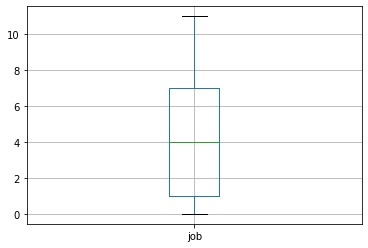

In [14]:
df[['job']].boxplot()

In [15]:
df['marital']

0        married
1        married
2        married
3        married
4        married
          ...   
11157     single
11158    married
11159     single
11160    married
11161    married
Name: marital, Length: 11162, dtype: object

In [16]:
df['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [17]:
df['marital'].replace({'married':1,'single':0,'divorced':2},inplace=True)

In [18]:
df['marital']

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    1
11159    0
11160    1
11161    1
Name: marital, Length: 11162, dtype: int64

In [19]:
df['marital'].value_counts()

1    6351
0    3518
2    1293
Name: marital, dtype: int64

<AxesSubplot:>

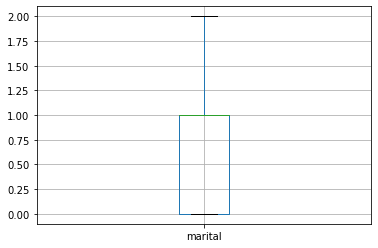

In [20]:
df[['marital']].boxplot()

In [21]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [22]:
label_enc = LabelEncoder()
label_enc.fit_transform(df['education'])

array([1, 1, 1, ..., 1, 1, 1])

In [23]:
label_enc = LabelEncoder()
df['education']=label_enc.fit_transform(df['education'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,0,1,1,0,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,9,1,1,0,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,7,1,1,0,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,0,1,2,0,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [24]:
df['education'].value_counts()

1    5476
2    3689
0    1500
3     497
Name: education, dtype: int64

<AxesSubplot:>

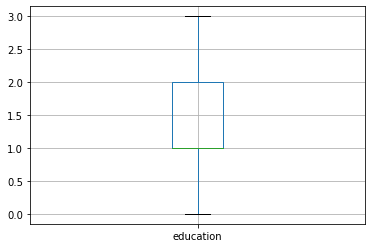

In [25]:
df[['education']].boxplot()

In [26]:
df['age']

0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11162, dtype: int64

In [27]:
df['age'].unique()

array([59, 56, 41, 55, 54, 42, 60, 37, 28, 38, 30, 29, 46, 31, 35, 32, 49,
       43, 26, 40, 33, 23, 48, 45, 36, 52, 53, 39, 57, 51, 44, 24, 50, 27,
       34, 47, 25, 58, 61, 68, 75, 22, 69, 66, 85, 72, 90, 67, 71, 21, 74,
       65, 62, 83, 70, 76, 77, 19, 73, 63, 20, 78, 95, 64, 79, 82, 18, 86,
       84, 87, 92, 81, 80, 93, 88, 89], dtype=int64)

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,0,1,1,0,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,9,1,1,0,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,7,1,1,0,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,0,1,2,0,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [29]:
df['balance']

0        2343
1          45
2        1270
3        2476
4         184
         ... 
11157       1
11158     733
11159      29
11160       0
11161       0
Name: balance, Length: 11162, dtype: int64

In [30]:
df['balance'].nunique()

3805

In [31]:
df['balance'].value_counts()

0       774
1        39
3        35
2        34
4        29
       ... 
4641      1
2975      1
918       1
2959      1
7561      1
Name: balance, Length: 3805, dtype: int64

<AxesSubplot:xlabel='balance'>

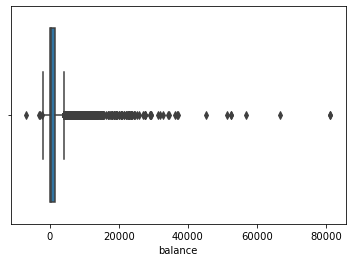

In [32]:
sns.boxplot(df['balance'])

In [33]:
#use IQR
q1 = df['balance'].quantile(0.25)
print('Q1 ==',q1)
q2 = df['balance'].quantile(0.50)
print('Q2 ==',q2)
q3 = df['balance'].quantile(0.75)
print('Q3 ==',q3)

iqr = q3-q1
print('IQR ==',iqr)

upper_limit = q3 + (iqr*1.5)
lower_limit = q1 - (1.5 * iqr)
print('upper_limit ==',upper_limit)
print('lower_limit ==',lower_limit)

Q1 == 122.0
Q2 == 550.0
Q3 == 1708.0
IQR == 1586.0
upper_limit == 4087.0
lower_limit == -2257.0


In [34]:
df['balance'] = np.where(df['balance']>upper_limit,upper_limit,df['balance'])
df['balance'] = np.where(df['balance']<lower_limit,lower_limit,df['balance'])

In [35]:
df['balance'].value_counts()

 4087.0    1052
 0.0        774
 1.0         39
 3.0         35
 2.0         34
           ... 
 959.0        1
 1459.0       1
-762.0        1
 3740.0       1
 3357.0       1
Name: balance, Length: 2970, dtype: int64

<AxesSubplot:>

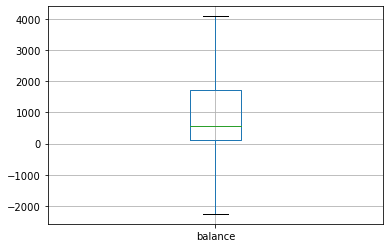

In [36]:
df[['balance']].boxplot()

In [37]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [38]:
df['housing']

0        yes
1         no
2        yes
3        yes
4         no
        ... 
11157    yes
11158     no
11159     no
11160     no
11161     no
Name: housing, Length: 11162, dtype: object

In [39]:
label_enc = LabelEncoder()
label_enc.fit_transform(df['housing'])

array([1, 0, 1, ..., 0, 0, 0])

In [40]:
label_enc = LabelEncoder()
df['housing']=label_enc.fit_transform(df['housing'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343.0,1,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,0,1,1,0,45.0,0,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,9,1,1,0,1270.0,1,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,7,1,1,0,2476.0,1,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,0,1,2,0,184.0,0,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,0,0,1.0,1,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,7,1,1,0,733.0,0,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,9,0,1,0,29.0,0,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,9,1,1,0,0.0,0,yes,cellular,8,may,9,2,172,5,failure,no


<AxesSubplot:>

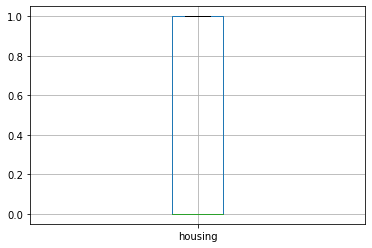

In [41]:
df[['housing']].boxplot()

In [42]:
df['loan']

0         no
1         no
2         no
3         no
4         no
        ... 
11157     no
11158     no
11159     no
11160    yes
11161     no
Name: loan, Length: 11162, dtype: object

In [43]:
df['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [44]:
label_enc = LabelEncoder()
label_enc.fit_transform(df['loan'])

array([0, 0, 0, ..., 0, 1, 0])

In [45]:
label_enc = LabelEncoder()
df['loan']=label_enc.fit_transform(df['loan'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343.0,1,0,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,0,1,1,0,45.0,0,0,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,9,1,1,0,1270.0,1,0,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,7,1,1,0,2476.0,1,0,unknown,5,may,579,1,-1,0,unknown,yes
4,54,0,1,2,0,184.0,0,0,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,0,0,1.0,1,0,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,7,1,1,0,733.0,0,0,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,9,0,1,0,29.0,0,0,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,9,1,1,0,0.0,0,1,cellular,8,may,9,2,172,5,failure,no


<AxesSubplot:>

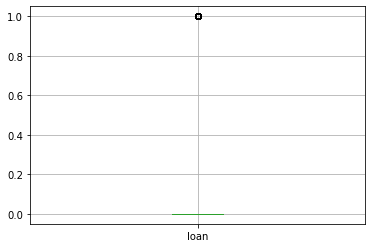

In [46]:
df[['loan']].boxplot()

In [47]:
df['loan'].value_counts()

0    9702
1    1460
Name: loan, dtype: int64

In [48]:
df['contact']

0         unknown
1         unknown
2         unknown
3         unknown
4         unknown
           ...   
11157    cellular
11158     unknown
11159    cellular
11160    cellular
11161    cellular
Name: contact, Length: 11162, dtype: object

In [49]:
df['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [50]:
label_enc = LabelEncoder()
label_enc.fit_transform(df['contact'])

array([2, 2, 2, ..., 0, 0, 0])

In [51]:
label_enc = LabelEncoder()
df['contact']=label_enc.fit_transform(df['contact'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343.0,1,0,2,5,may,1042,1,-1,0,unknown,yes
1,56,0,1,1,0,45.0,0,0,2,5,may,1467,1,-1,0,unknown,yes
2,41,9,1,1,0,1270.0,1,0,2,5,may,1389,1,-1,0,unknown,yes
3,55,7,1,1,0,2476.0,1,0,2,5,may,579,1,-1,0,unknown,yes
4,54,0,1,2,0,184.0,0,0,2,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,0,0,1.0,1,0,0,20,apr,257,1,-1,0,unknown,no
11158,39,7,1,1,0,733.0,0,0,2,16,jun,83,4,-1,0,unknown,no
11159,32,9,0,1,0,29.0,0,0,0,19,aug,156,2,-1,0,unknown,no
11160,43,9,1,1,0,0.0,0,1,0,8,may,9,2,172,5,failure,no


In [52]:
df['contact'].value_counts()

0    8042
2    2346
1     774
Name: contact, dtype: int64

<AxesSubplot:>

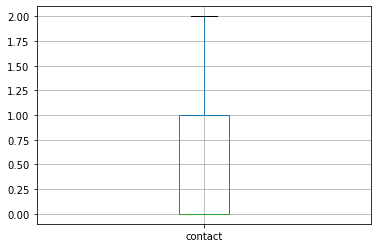

In [53]:
df[['contact']].boxplot()

In [54]:
df['day']

0         5
1         5
2         5
3         5
4         5
         ..
11157    20
11158    16
11159    19
11160     8
11161     9
Name: day, Length: 11162, dtype: int64

In [55]:
df['day'].value_counts()

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

<AxesSubplot:>

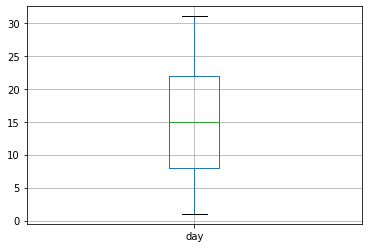

In [56]:
df[['day']].boxplot()

In [57]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [58]:
df['month']

0        may
1        may
2        may
3        may
4        may
        ... 
11157    apr
11158    jun
11159    aug
11160    may
11161    jul
Name: month, Length: 11162, dtype: object

In [59]:
df['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [60]:
label_enc = LabelEncoder()
label_enc.fit_transform(df['month'])

array([8, 8, 8, ..., 1, 8, 5])

In [61]:
label_enc = LabelEncoder()
df['month']=label_enc.fit_transform(df['month'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343.0,1,0,2,5,8,1042,1,-1,0,unknown,yes
1,56,0,1,1,0,45.0,0,0,2,5,8,1467,1,-1,0,unknown,yes
2,41,9,1,1,0,1270.0,1,0,2,5,8,1389,1,-1,0,unknown,yes
3,55,7,1,1,0,2476.0,1,0,2,5,8,579,1,-1,0,unknown,yes
4,54,0,1,2,0,184.0,0,0,2,5,8,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,0,0,1.0,1,0,0,20,0,257,1,-1,0,unknown,no
11158,39,7,1,1,0,733.0,0,0,2,16,6,83,4,-1,0,unknown,no
11159,32,9,0,1,0,29.0,0,0,0,19,1,156,2,-1,0,unknown,no
11160,43,9,1,1,0,0.0,0,1,0,8,8,9,2,172,5,failure,no


In [62]:
df['month'].value_counts()

8     2824
1     1519
5     1514
6     1222
9      943
0      923
3      776
10     392
4      344
11     319
7      276
2      110
Name: month, dtype: int64

<AxesSubplot:>

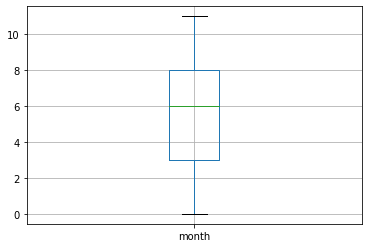

In [63]:
df[['month']].boxplot()

In [64]:
df['duration']

0        1042
1        1467
2        1389
3         579
4         673
         ... 
11157     257
11158      83
11159     156
11160       9
11161     628
Name: duration, Length: 11162, dtype: int64

In [65]:
df['duration'].value_counts()

97      39
161     38
158     37
150     37
119     37
        ..
1211     1
1195     1
1139     1
1107     1
2053     1
Name: duration, Length: 1428, dtype: int64

<AxesSubplot:>

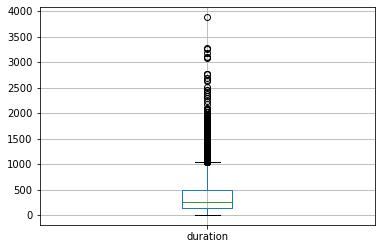

In [66]:
df[['duration']].boxplot()

In [67]:
#use IQR
q1 = df['duration'].quantile(0.25)
print('Q1 ==',q1)
q2 = df['duration'].quantile(0.50)
print('Q2 ==',q2)
q3 = df['duration'].quantile(0.75)
print('Q3 ==',q3)

iqr = q3-q1
print('IQR ==',iqr)

upper_limit = q3 + (iqr*1.5)

print('upper_limit ==',upper_limit)


Q1 == 138.0
Q2 == 255.0
Q3 == 496.0
IQR == 358.0
upper_limit == 1033.0


In [68]:
df['duration'] = np.where(df['duration']>upper_limit,upper_limit,df['duration'])


<AxesSubplot:>

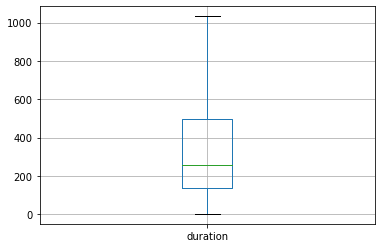

In [69]:
df[['duration']].boxplot()

In [70]:
df['campaign']

0        1
1        1
2        1
3        1
4        2
        ..
11157    1
11158    4
11159    2
11160    2
11161    1
Name: campaign, Length: 11162, dtype: int64

In [71]:
df['campaign'].value_counts()

1     4798
2     3028
3     1321
4      771
5      378
6      265
7      139
8      128
9       72
10      52
11      40
13      30
12      29
14      15
17      14
15      13
16       9
18       8
21       8
24       5
19       5
20       5
30       4
22       4
26       3
23       3
25       3
43       2
29       2
32       2
63       1
33       1
41       1
31       1
28       1
27       1
Name: campaign, dtype: int64

<AxesSubplot:>

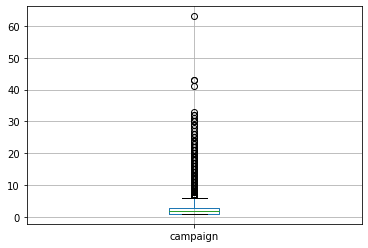

In [72]:
df[['campaign']].boxplot()

In [73]:
#use IQR
q1 = df['campaign'].quantile(0.25)
print('Q1 ==',q1)
q2 = df['campaign'].quantile(0.50)
print('Q2 ==',q2)
q3 = df['campaign'].quantile(0.75)
print('Q3 ==',q3)

iqr = q3-q1
print('IQR ==',iqr)

upper_limit = q3 + (iqr*1.5)

print('upper_limit ==',upper_limit)


Q1 == 1.0
Q2 == 2.0
Q3 == 3.0
IQR == 2.0
upper_limit == 6.0


In [74]:
df['campaign'] = np.where(df['campaign']>upper_limit,upper_limit,df['campaign'])


<AxesSubplot:>

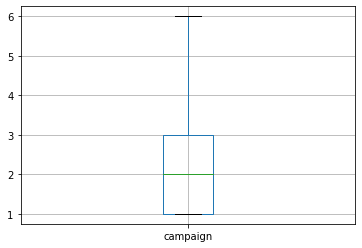

In [75]:
df[['campaign']].boxplot()

In [76]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343.0,1,0,2,5,8,1033.0,1.0,-1,0,unknown,yes
1,56,0,1,1,0,45.0,0,0,2,5,8,1033.0,1.0,-1,0,unknown,yes
2,41,9,1,1,0,1270.0,1,0,2,5,8,1033.0,1.0,-1,0,unknown,yes
3,55,7,1,1,0,2476.0,1,0,2,5,8,579.0,1.0,-1,0,unknown,yes
4,54,0,1,2,0,184.0,0,0,2,5,8,673.0,2.0,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,0,0,1.0,1,0,0,20,0,257.0,1.0,-1,0,unknown,no
11158,39,7,1,1,0,733.0,0,0,2,16,6,83.0,4.0,-1,0,unknown,no
11159,32,9,0,1,0,29.0,0,0,0,19,1,156.0,2.0,-1,0,unknown,no
11160,43,9,1,1,0,0.0,0,1,0,8,8,9.0,2.0,172,5,failure,no


In [77]:
df['pdays']

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
11157     -1
11158     -1
11159     -1
11160    172
11161     -1
Name: pdays, Length: 11162, dtype: int64

In [78]:
df['pdays'].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

<AxesSubplot:>

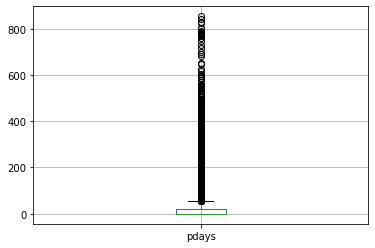

In [79]:
df[['pdays']].boxplot()

In [80]:
#use IQR
q1 = df['pdays'].quantile(0.25)
print('Q1 ==',q1)
q2 = df['pdays'].quantile(0.50)
print('Q2 ==',q2)
q3 = df['pdays'].quantile(0.75)
print('Q3 ==',q3)

iqr = q3-q1
print('IQR ==',iqr)

upper_limit = q3 + (iqr*1.5)

print('upper_limit ==',upper_limit)


Q1 == -1.0
Q2 == -1.0
Q3 == 20.75
IQR == 21.75
upper_limit == 53.375


In [81]:
df['pdays'] = np.where(df['pdays']>upper_limit,upper_limit,df['pdays'])

<AxesSubplot:>

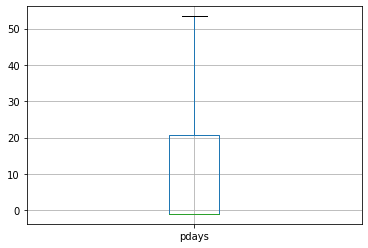

In [82]:
df[['pdays']].boxplot()

In [83]:
df['previous'].value_counts()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
17      11
13      11
14       6
15       5
19       4
16       2
27       2
23       2
20       2
58       1
26       1
18       1
28       1
41       1
21       1
29       1
37       1
40       1
22       1
30       1
55       1
Name: previous, dtype: int64

<AxesSubplot:>

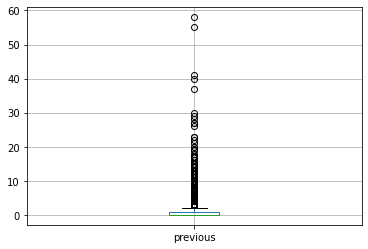

In [84]:
df[['previous']].boxplot()

In [85]:
#use IQR
q1 = df['previous'].quantile(0.25)
print('Q1 ==',q1)
q2 = df['previous'].quantile(0.50)
print('Q2 ==',q2)
q3 = df['previous'].quantile(0.75)
print('Q3 ==',q3)

iqr = q3-q1
print('IQR ==',iqr)

upper_limit = q3 + (iqr*1.5)

print('upper_limit ==',upper_limit)


Q1 == 0.0
Q2 == 0.0
Q3 == 1.0
IQR == 1.0
upper_limit == 2.5


In [86]:
df['previous'] = np.where(df['previous']>upper_limit,upper_limit,df['previous'])

<AxesSubplot:>

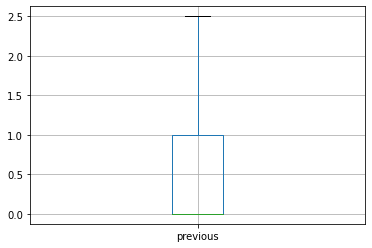

In [87]:
df[['previous']].boxplot()

In [88]:
df['poutcome']

0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
11157    unknown
11158    unknown
11159    unknown
11160    failure
11161    unknown
Name: poutcome, Length: 11162, dtype: object

In [89]:
df['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [90]:
label_enc = LabelEncoder()
label_enc.fit_transform(df['poutcome'])

array([3, 3, 3, ..., 3, 0, 3])

In [91]:
label_enc = LabelEncoder()
df['poutcome']=label_enc.fit_transform(df['poutcome'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343.0,1,0,2,5,8,1033.0,1.0,-1.000,0.0,3,yes
1,56,0,1,1,0,45.0,0,0,2,5,8,1033.0,1.0,-1.000,0.0,3,yes
2,41,9,1,1,0,1270.0,1,0,2,5,8,1033.0,1.0,-1.000,0.0,3,yes
3,55,7,1,1,0,2476.0,1,0,2,5,8,579.0,1.0,-1.000,0.0,3,yes
4,54,0,1,2,0,184.0,0,0,2,5,8,673.0,2.0,-1.000,0.0,3,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,0,0,1.0,1,0,0,20,0,257.0,1.0,-1.000,0.0,3,no
11158,39,7,1,1,0,733.0,0,0,2,16,6,83.0,4.0,-1.000,0.0,3,no
11159,32,9,0,1,0,29.0,0,0,0,19,1,156.0,2.0,-1.000,0.0,3,no
11160,43,9,1,1,0,0.0,0,1,0,8,8,9.0,2.0,53.375,2.5,0,no


<AxesSubplot:>

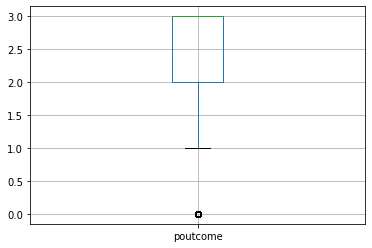

In [92]:
df[['poutcome']].boxplot()

In [93]:
df['deposit']

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [94]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [95]:
df['deposit'].replace({'yes':1, 'no':0},inplace=True)

In [96]:
df['deposit']

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

<AxesSubplot:>

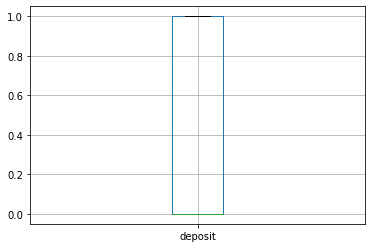

In [97]:
df[['deposit']].boxplot()

<AxesSubplot:>

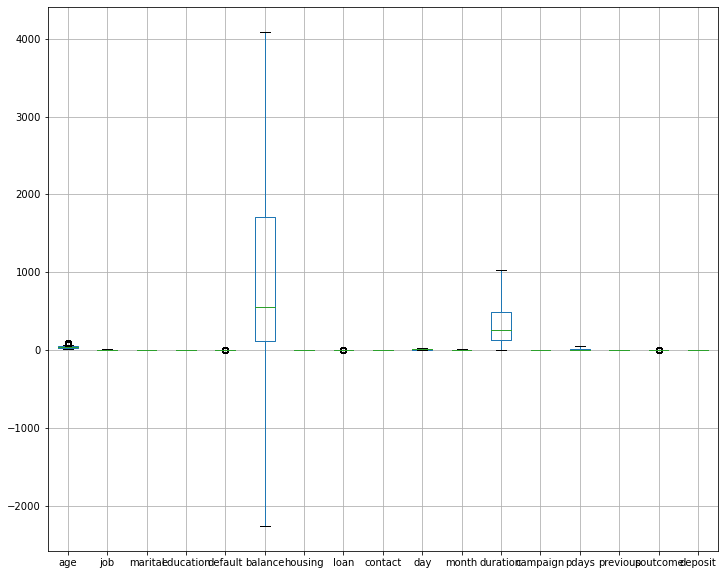

In [98]:
df.boxplot(figsize=(12,10))

In [99]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,1.000000,-0.031603,0.442782,-0.126018,-0.011425,0.136901,-0.168700,-0.031418,0.027762,-0.000762,-0.026130,0.000812,0.001307,0.027880,0.034191,-0.002699,0.034901
job,-0.031603,1.000000,-0.078314,0.147046,-0.007066,0.039253,-0.136965,-0.067092,-0.087915,0.026589,-0.076011,0.004384,0.006588,0.020541,0.021446,-0.004238,0.063395
marital,0.442782,-0.078314,1.000000,-0.125845,0.014691,0.002556,0.036345,0.062029,0.060456,0.003642,0.004070,-0.010624,0.035482,-0.044760,-0.038993,0.039424,-0.067610
education,-0.126018,0.147046,-0.125845,1.000000,-0.010709,0.064457,-0.109168,-0.073154,-0.132540,0.016759,-0.055868,-0.015580,-0.010483,0.062489,0.055782,-0.040262,0.095948
default,-0.011425,-0.007066,0.014691,-0.010709,1.000000,-0.106135,0.011076,0.076434,0.035709,0.017342,0.000950,-0.005503,0.022697,-0.052776,-0.052801,0.042357,-0.040680
balance,0.136901,0.039253,0.002556,0.064457,-0.106135,1.000000,-0.099115,-0.127886,-0.043014,0.011678,0.027196,0.042808,-0.032775,0.076411,0.071769,-0.051494,0.137930
housing,-0.168700,-0.136965,0.036345,-0.109168,0.011076,-0.099115,1.000000,0.076761,0.226392,-0.014770,0.219602,0.030484,-0.007187,-0.022994,-0.023499,-0.046370,-0.203888
loan,-0.031418,-0.067092,0.062029,-0.073154,0.076434,-0.127886,0.076761,1.000000,0.006829,0.017269,0.025329,-0.009149,0.029464,-0.058843,-0.053341,0.026344,-0.110580
contact,0.027762,-0.087915,0.060456,-0.132540,0.035709,-0.043014,0.226392,0.006829,1.000000,0.007943,0.289803,-0.036054,0.045031,-0.284438,-0.265899,0.257993,-0.249847
day,-0.000762,0.026589,0.003642,0.016759,0.017342,0.011678,-0.014770,0.017269,0.007943,1.000000,-0.019840,-0.025378,0.130002,-0.082024,-0.079515,0.080221,-0.056326


In [100]:
import matplotlib.pyplot as plt

<AxesSubplot:>

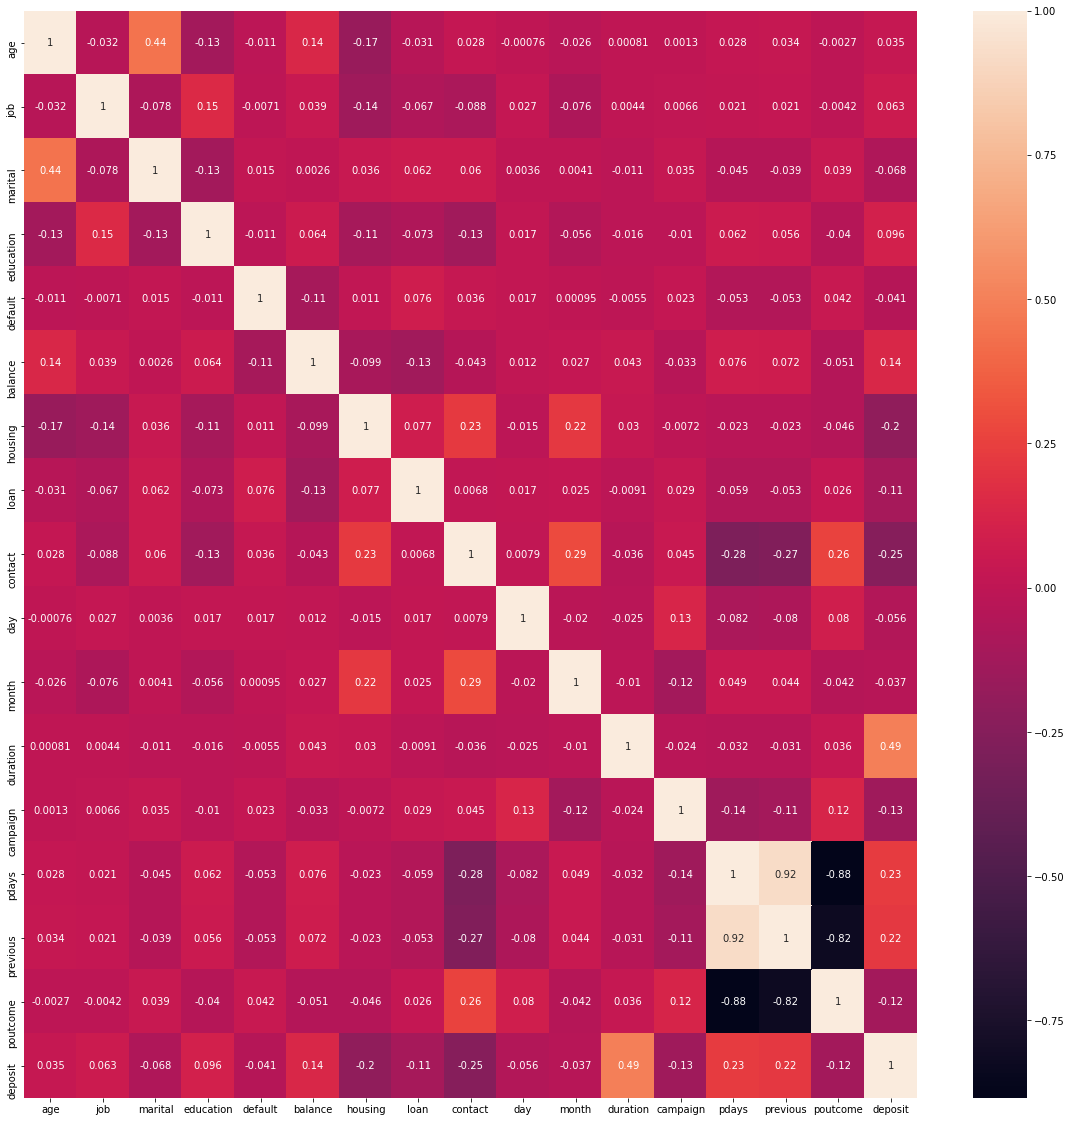

In [101]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [102]:
#feature selection

In [103]:
x = df.drop('default',axis=1)
x

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,2343.0,1,0,2,5,8,1033.0,1.0,-1.000,0.0,3,1
1,56,0,1,1,45.0,0,0,2,5,8,1033.0,1.0,-1.000,0.0,3,1
2,41,9,1,1,1270.0,1,0,2,5,8,1033.0,1.0,-1.000,0.0,3,1
3,55,7,1,1,2476.0,1,0,2,5,8,579.0,1.0,-1.000,0.0,3,1
4,54,0,1,2,184.0,0,0,2,5,8,673.0,2.0,-1.000,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,0,1.0,1,0,0,20,0,257.0,1.0,-1.000,0.0,3,0
11158,39,7,1,1,733.0,0,0,2,16,6,83.0,4.0,-1.000,0.0,3,0
11159,32,9,0,1,29.0,0,0,0,19,1,156.0,2.0,-1.000,0.0,3,0
11160,43,9,1,1,0.0,0,1,0,8,8,9.0,2.0,53.375,2.5,0,0


In [104]:
y=df['default']
y

0        0
1        0
2        0
3        0
4        0
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: default, Length: 11162, dtype: int64

In [105]:
#logistic regression 

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [108]:
x_train

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8169,41,1,0,1,3851.0,0,0,0,19,9,130.0,1.0,-1.000,0.0,3,0
4779,38,1,0,2,2885.0,1,0,2,20,6,1033.0,6.0,-1.000,0.0,3,1
5476,34,1,1,2,748.0,1,1,0,6,8,161.0,1.0,-1.000,0.0,3,0
4766,34,0,1,2,69.0,0,1,0,25,9,296.0,1.0,53.375,2.0,0,1
11044,32,7,1,1,0.0,0,0,0,31,5,105.0,6.0,-1.000,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,26,9,1,1,744.0,0,0,0,15,0,609.0,1.0,-1.000,0.0,3,0
10955,39,9,1,1,-1451.0,1,1,0,30,5,65.0,5.0,-1.000,0.0,3,0
905,27,2,1,1,2329.0,0,0,1,27,10,131.0,1.0,-1.000,0.0,3,1
5192,41,0,0,1,985.0,1,0,0,30,6,274.0,2.0,53.375,2.5,2,1


In [109]:
x_test

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8422,31,0,0,1,554.0,1,0,0,5,3,94.0,1.0,-1.000,0.0,3,0
9226,43,1,1,1,514.0,1,1,0,20,0,34.0,2.0,-1.000,0.0,3,0
8162,26,1,0,1,277.0,0,0,2,14,8,514.0,2.0,-1.000,0.0,3,0
4337,39,7,0,1,91.0,0,0,0,3,11,213.0,1.0,53.375,1.0,2,1
2438,40,4,1,2,0.0,0,0,0,6,1,131.0,2.0,53.375,2.5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,36,0,1,1,465.0,1,0,2,20,8,160.0,1.0,-1.000,0.0,3,0
4360,28,8,0,1,1377.0,1,0,0,14,8,688.0,2.0,-1.000,0.0,3,1
2316,52,2,1,1,1306.0,0,0,0,15,6,288.0,1.0,-1.000,0.0,3,1
5073,30,4,0,2,102.0,1,0,0,18,2,364.0,3.0,-1.000,0.0,3,1


In [110]:
y_train

8169     0
4779     0
5476     0
4766     0
11044    0
        ..
7813     0
10955    0
905      0
5192     0
235      0
Name: default, Length: 8929, dtype: int64

In [111]:
y_test

8422    0
9226    0
8162    0
4337    0
2438    0
       ..
6641    0
4360    0
2316    0
5073    0
7256    0
Name: default, Length: 2233, dtype: int64

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [114]:
y_pred = lr_model.predict(x_test)
print('y_pred :',y_pred[:10])

y_pred : [0 0 0 0 0 0 0 0 0 0]


In [115]:
y_test[:10]

8422    0
9226    0
8162    0
4337    0
2438    0
5948    0
4135    0
9528    0
1271    0
3207    0
Name: default, dtype: int64

In [116]:
#accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score

In [117]:
#testing_acc
y_pred = lr_model.predict(x_test)
print('y_pred :',y_pred[:10])

confusion_matrix_= confusion_matrix(y_test,y_pred)
print('confusion_matrix \n',confusion_matrix_)

accuracy = accuracy_score(y_test,y_pred)
print('accuracy :', accuracy)

class_report = classification_report(y_test,y_pred)
print(class_report)

y_pred : [0 0 0 0 0 0 0 0 0 0]
confusion_matrix 
 [[2208    0]
 [  25    0]]
accuracy : 0.9888042991491267
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2208
           1       0.00      0.00      0.00        25

    accuracy                           0.99      2233
   macro avg       0.49      0.50      0.50      2233
weighted avg       0.98      0.99      0.98      2233



In [118]:
#Training accuracy

In [119]:
y_pred_train = lr_model.predict(x_train)
print('y_pred :',y_pred[:10])

confusion_matrix_= confusion_matrix(y_train,y_pred_train)
print('confusion_matrix \n',confusion_matrix_)

accuracy = accuracy_score(y_train,y_pred_train)
print('accuracy :', accuracy)

class_report = classification_report(y_train,y_pred_train)
print(class_report)

y_pred : [0 0 0 0 0 0 0 0 0 0]
confusion_matrix 
 [[8779    7]
 [ 141    2]]
accuracy : 0.9834247956098108
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8786
           1       0.22      0.01      0.03       143

    accuracy                           0.98      8929
   macro avg       0.60      0.51      0.51      8929
weighted avg       0.97      0.98      0.98      8929



In [120]:
y_pred_proba = lr_model.predict_proba(x_test)
print('y_pred_proba :',y_pred_proba)

y_pred_proba : [[0.98389449 0.01610551]
 [0.98166573 0.01833427]
 [0.97391311 0.02608689]
 ...
 [0.99732562 0.00267438]
 [0.98011194 0.01988806]
 [0.96871936 0.03128064]]


In [121]:
y_pred_proba[:,0]

array([0.98389449, 0.98166573, 0.97391311, ..., 0.99732562, 0.98011194,
       0.96871936])

In [122]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_proba[:,1])

Text(0, 0.5, 'True Positive Rate')

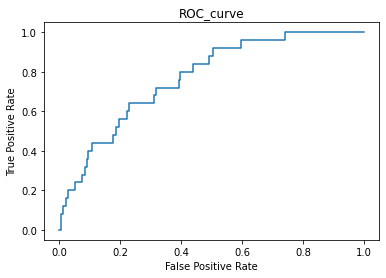

In [123]:
plt.title('ROC_curve')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [124]:
auc_score = roc_auc_score(y_test,y_pred_proba[:,0])
auc_score

0.23076086956521738

In [125]:
#K-Nearest_Neighbour

In [126]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343.0,1,0,2,5,8,1033.0,1.0,-1.000,0.0,3,1
1,56,0,1,1,0,45.0,0,0,2,5,8,1033.0,1.0,-1.000,0.0,3,1
2,41,9,1,1,0,1270.0,1,0,2,5,8,1033.0,1.0,-1.000,0.0,3,1
3,55,7,1,1,0,2476.0,1,0,2,5,8,579.0,1.0,-1.000,0.0,3,1
4,54,0,1,2,0,184.0,0,0,2,5,8,673.0,2.0,-1.000,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,0,0,0,1.0,1,0,0,20,0,257.0,1.0,-1.000,0.0,3,0
11158,39,7,1,1,0,733.0,0,0,2,16,6,83.0,4.0,-1.000,0.0,3,0
11159,32,9,0,1,0,29.0,0,0,0,19,1,156.0,2.0,-1.000,0.0,3,0
11160,43,9,1,1,0,0.0,0,1,0,8,8,9.0,2.0,53.375,2.5,0,0


In [127]:
x_train

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8169,41,1,0,1,3851.0,0,0,0,19,9,130.0,1.0,-1.000,0.0,3,0
4779,38,1,0,2,2885.0,1,0,2,20,6,1033.0,6.0,-1.000,0.0,3,1
5476,34,1,1,2,748.0,1,1,0,6,8,161.0,1.0,-1.000,0.0,3,0
4766,34,0,1,2,69.0,0,1,0,25,9,296.0,1.0,53.375,2.0,0,1
11044,32,7,1,1,0.0,0,0,0,31,5,105.0,6.0,-1.000,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,26,9,1,1,744.0,0,0,0,15,0,609.0,1.0,-1.000,0.0,3,0
10955,39,9,1,1,-1451.0,1,1,0,30,5,65.0,5.0,-1.000,0.0,3,0
905,27,2,1,1,2329.0,0,0,1,27,10,131.0,1.0,-1.000,0.0,3,1
5192,41,0,0,1,985.0,1,0,0,30,6,274.0,2.0,53.375,2.5,2,1


In [128]:
y_train

8169     0
4779     0
5476     0
4766     0
11044    0
        ..
7813     0
10955    0
905      0
5192     0
235      0
Name: default, Length: 8929, dtype: int64

In [129]:
x_test

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8422,31,0,0,1,554.0,1,0,0,5,3,94.0,1.0,-1.000,0.0,3,0
9226,43,1,1,1,514.0,1,1,0,20,0,34.0,2.0,-1.000,0.0,3,0
8162,26,1,0,1,277.0,0,0,2,14,8,514.0,2.0,-1.000,0.0,3,0
4337,39,7,0,1,91.0,0,0,0,3,11,213.0,1.0,53.375,1.0,2,1
2438,40,4,1,2,0.0,0,0,0,6,1,131.0,2.0,53.375,2.5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6641,36,0,1,1,465.0,1,0,2,20,8,160.0,1.0,-1.000,0.0,3,0
4360,28,8,0,1,1377.0,1,0,0,14,8,688.0,2.0,-1.000,0.0,3,1
2316,52,2,1,1,1306.0,0,0,0,15,6,288.0,1.0,-1.000,0.0,3,1
5073,30,4,0,2,102.0,1,0,0,18,2,364.0,3.0,-1.000,0.0,3,1


In [130]:
y_test

8422    0
9226    0
8162    0
4337    0
2438    0
       ..
6641    0
4360    0
2316    0
5073    0
7256    0
Name: default, Length: 2233, dtype: int64

In [131]:
#scaling

In [132]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [133]:
norm_scaler = MinMaxScaler()
norm_scaler.fit_transform(x_train)
dfx_train = pd.DataFrame(norm_scaler.fit_transform(x_train),columns = x_train.columns)
dfx_train

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.298701,0.090909,0.0,0.333333,0.962799,0.0,0.0,0.0,0.600000,0.818182,0.124151,0.0,0.0,0.0,1.000000,0.0
1,0.259740,0.090909,0.0,0.666667,0.810530,1.0,0.0,1.0,0.633333,0.545455,1.000000,1.0,0.0,0.0,1.000000,1.0
2,0.207792,0.090909,0.5,0.666667,0.473676,1.0,1.0,0.0,0.166667,0.727273,0.154219,0.0,0.0,0.0,1.000000,0.0
3,0.207792,0.000000,0.5,0.666667,0.366646,0.0,1.0,0.0,0.800000,0.818182,0.285160,0.0,1.0,0.8,0.000000,1.0
4,0.181818,0.636364,0.5,0.333333,0.355769,0.0,0.0,0.0,1.000000,0.454545,0.099903,1.0,0.0,0.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8924,0.103896,0.818182,0.5,0.333333,0.473045,0.0,0.0,0.0,0.466667,0.000000,0.588749,0.0,0.0,0.0,1.000000,0.0
8925,0.272727,0.818182,0.5,0.333333,0.127049,1.0,1.0,0.0,0.966667,0.454545,0.061106,0.8,0.0,0.0,1.000000,0.0
8926,0.116883,0.181818,0.5,0.333333,0.722888,0.0,0.0,0.5,0.866667,0.909091,0.125121,0.0,0.0,0.0,1.000000,1.0
8927,0.298701,0.000000,0.0,0.333333,0.511034,1.0,0.0,0.0,0.966667,0.545455,0.263822,0.2,1.0,1.0,0.666667,1.0


In [134]:
norm_scaler.transform(x_test)
dfx_test = pd.DataFrame(norm_scaler.transform(x_test),columns=x_test.columns)
dfx_test

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,0.168831,0.000000,0.0,0.333333,0.443096,1.0,0.0,0.0,0.133333,0.272727,0.089234,0.0,0.0,0.0,1.000000,0.0
1,0.324675,0.090909,0.5,0.333333,0.436791,1.0,1.0,0.0,0.633333,0.000000,0.031038,0.2,0.0,0.0,1.000000,0.0
2,0.103896,0.090909,0.0,0.333333,0.399433,0.0,0.0,1.0,0.433333,0.727273,0.496605,0.2,0.0,0.0,1.000000,0.0
3,0.272727,0.636364,0.0,0.333333,0.370113,0.0,0.0,0.0,0.066667,1.000000,0.204656,0.0,1.0,0.4,0.666667,1.0
4,0.285714,0.363636,0.5,0.666667,0.355769,0.0,0.0,0.0,0.166667,0.090909,0.125121,0.2,1.0,1.0,0.666667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,0.233766,0.000000,0.5,0.333333,0.429067,1.0,0.0,1.0,0.633333,0.727273,0.153249,0.0,0.0,0.0,1.000000,0.0
2229,0.129870,0.727273,0.0,0.333333,0.572825,1.0,0.0,0.0,0.433333,0.727273,0.665373,0.2,0.0,0.0,1.000000,1.0
2230,0.441558,0.181818,0.5,0.333333,0.561633,0.0,0.0,0.0,0.466667,0.545455,0.277401,0.0,0.0,0.0,1.000000,1.0
2231,0.155844,0.363636,0.0,0.666667,0.371847,1.0,0.0,0.0,0.566667,0.181818,0.351115,0.4,0.0,0.0,1.000000,1.0


In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
knn_model = KNeighborsClassifier(n_neighbors=11,p=2)
knn_model.fit(dfx_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [137]:
y_pred_k = knn_model.predict(dfx_test)
y_pred_k[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [149]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [139]:
#testing accuracy

In [140]:
y_pred_k = knn_model.predict(dfx_test)
print('y_pred_k :', y_pred_k[:10])

confusion_metrix = confusion_matrix(y_test,y_pred_k)
print('confusion_matrix \n', confusion_matrix_)

accuracy = accuracy_score(y_test,y_pred_k)
print('accuracy :',accuracy)

class_report = classification_report(y_test,y_pred_k)
print(class_report)

y_pred_k : [0 0 0 0 0 0 0 0 0 0]
confusion_matrix 
 [[8779    7]
 [ 141    2]]
accuracy : 0.9888042991491267
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2208
           1       0.00      0.00      0.00        25

    accuracy                           0.99      2233
   macro avg       0.49      0.50      0.50      2233
weighted avg       0.98      0.99      0.98      2233



In [141]:
#training acc 

In [142]:
y_pred_train = knn_model.predict(dfx_train)
print('y_pred_train :',y_pred_train[:10])

confusion_matrix_ = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix \n',confusion_matrix_)

accuracy = accuracy_score(y_train,y_pred_train)
print('accuracy :',accuracy)

class_report = classification_report(y_train,y_pred_train)
print(class_report)

y_pred_train : [0 0 0 0 0 0 0 0 0 0]
confusion_matrix 
 [[8786    0]
 [ 143    0]]
accuracy : 0.9839847687311009
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8786
           1       0.00      0.00      0.00       143

    accuracy                           0.98      8929
   macro avg       0.49      0.50      0.50      8929
weighted avg       0.97      0.98      0.98      8929



In [161]:
#overfiiting occure need hyperparameter tunning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [162]:
knn_neighbor = KNeighborsClassifier()
hyp = {'n_neighbors':np.arange(10,55),'p':[1,2]}
gscv_knn_model = GridSearchCV(knn_neighbor,hyp,cv=5)
gscv_knn_model.fit(dfx_train,y_train)
gscv_knn_model.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1)

In [164]:
gscv_knn_model.best_params_

{'n_neighbors': 10, 'p': 1}

In [ ]:
#testing accuracy

In [166]:
y_pred_k = gscv_knn_model.predict(dfx_test)
print('y_pred_k :',y_pred_k[:10])

confusion_matrix_ = confusion_matrix(y_test,y_pred_k)
print('confusion_matrix \n',confusion_matrix_)

accuracy = accuracy_score(y_test,y_pred_k)
print('accuracy :',accuracy)

class_report = classification_report(y_test,y_pred_k)
print(class_report)

y_pred_k : [0 0 0 0 0 0 0 0 0 0]
confusion_matrix 
 [[2208    0]
 [  25    0]]
accuracy : 0.9888042991491267
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2208
           1       0.00      0.00      0.00        25

    accuracy                           0.99      2233
   macro avg       0.49      0.50      0.50      2233
weighted avg       0.98      0.99      0.98      2233



In [167]:
#traning acc
y_pred_train = gscv_knn_model.predict(dfx_train)
print('y_pred_train :',y_pred_train[:10])

confusion_matrix_ = confusion_matrix(y_train,y_pred_train)
print('confusion_matrix \n', confusion_matrix_)

accuracy = accuracy_score(y_train,y_pred_train)
print('accuracy :',accuracy)

class_report = classification_report(y_train,y_pred_train)
print(class_report)

y_pred_train : [0 0 0 0 0 0 0 0 0 0]
confusion_matrix 
 [[8786    0]
 [ 143    0]]
accuracy : 0.9839847687311009
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8786
           1       0.00      0.00      0.00       143

    accuracy                           0.98      8929
   macro avg       0.49      0.50      0.50      8929
weighted avg       0.97      0.98      0.98      8929



In [168]:
y_pred_proba = gscv_knn_model.predict(dfx_test)
y_pred_proba

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
auc_score = roc_auc_score(y_test,y_pred_proba)
auc_score

0.5